# Introduction

This notebook presetns **Multi-Layer Perceptron** solution to MNIST dataset.

**Contents**

* [MNIST Dataset](#MNIST-Dataset) - load data
* [Keras Model](#Keras-Model) - create and train model

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# MNIST Dataset

Load MNIST Dataset from Keras API

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

Raw data shapes

In [4]:
print(x_train_raw.shape)
print(y_train_raw.shape)

(60000, 28, 28)
(60000,)


Show example images

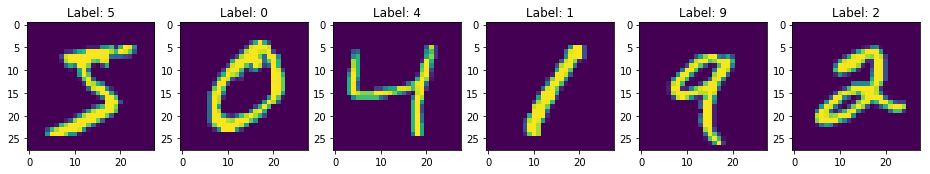

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
for i in range(len(axes)):
    axes[i].set_title('Label: '+str(y_train_raw[i]))
    axes[i].imshow(x_train_raw[i])

One-hot encode labels

In [6]:
y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)
print('y_train:')
print('shape', y_train.shape)
print('data')
print(y_train[:6])

y_train:
shape (60000, 10)
data
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Normalize and flatten images

In [7]:
x_train = (x_train_raw - x_train_raw.mean()) / x_train_raw.std()
x_test = (x_test_raw - x_train_raw.mean()) / x_train_raw.std()    # reuse mean/std from train set
x_train = x_train.reshape([len(x_train), -1])
x_test = x_test.reshape([len(x_test), -1])
print('x_train:')
print('shape', x_train.shape)
print('data')
print(x_train[0, 300:400].round(2))

x_train:
shape (60000, 784)
data
[-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42  1.35  2.8   1.99 -0.4  -0.42
 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.28
  1.99  2.8   0.47 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42  0.02  2.64  2.44  1.61  0.95 -0.41 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
 -0.42 -0.42 -0.42 -0.42]


# Keras Model

Simple multi-layer perceptron

In [8]:
from tensorflow.keras.layers import Dense, Dropout

model = tf.keras.Sequential()

model.add(Dense(units=512, activation='elu', input_dim=784))
model.add(Dropout(rate=0.2))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Keras only logs metrics every epoch, to get more datapoints we implement our own callback.

In [9]:
class Callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.hist = {'loss':[], 'acc':[]}
    def on_batch_end(self, batch, logs={}):
        self.hist['loss'].append(logs.get('loss'))
        self.hist['acc'].append(logs.get('acc'))

Train model

In [10]:
cback = Callback()
hist = model.fit(x=x_train, y=y_train, batch_size=1000, epochs=5, callbacks=[cback])

Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.4286 - acc: 0.8703
Epoch 2/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.1813 - acc: 0.9459
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.1298 - acc: 0.9604
Epoch 4/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.1007 - acc: 0.9694
Epoch 5/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0856 - acc: 0.9728


Final result

In [11]:
loss, acc = model.evaluate(x_train, y_train, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.984
Accuracy on test set:  0.975


Plot loss and accuracy over training period

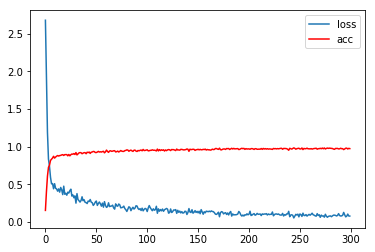

In [12]:
plt.plot(cback.hist['loss'], label='loss')
plt.plot(cback.hist['acc'], label='acc', color='red')
plt.legend();